In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

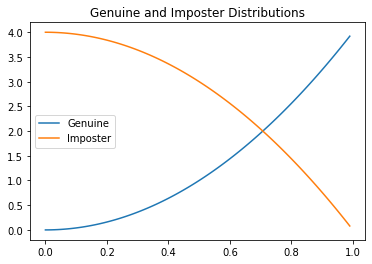

In [2]:
x = np.arange(0,1,0.01)
genuine = lambda x: 4 * x * x
imposter = lambda x: 4 - 4 * x * x
plt.title("Genuine and Imposter Distributions")
plt.plot(x,genuine(x),label="Genuine")
plt.plot(x,imposter(x),label="Imposter")
plt.legend()

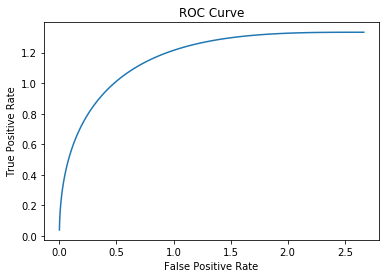

In [3]:
x = np.arange(0,1,0.01)
tpr = lambda x: 4/3 * (1 - x**3)
fpr = lambda x: 8/3 - (4*x - 4/3*(x**3))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr(x), tpr(x))

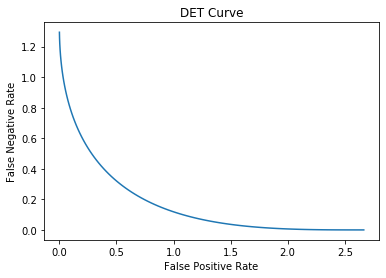

In [4]:
x = np.arange(0,1,0.01)
fpr = lambda x: 8/3 - (4*x - 4/3*(x**3))
fnr = lambda x: 4/3*(x**3)
plt.title("DET Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.plot(fpr(x),fnr(x))

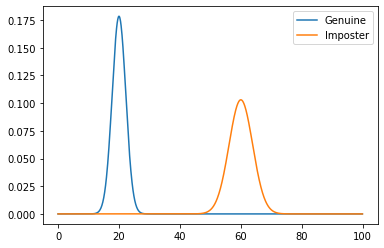

In [8]:
import scipy.stats as stats
import math

x = np.arange(0, 100, 0.1)
genuine = lambda x: stats.norm.pdf(x, 20, math.sqrt(5))
imposter = lambda x: stats.norm.pdf(x, 60, math.sqrt(15))
plt.plot(x, genuine(x), label="Genuine")
plt.plot(x, imposter(x), label="Imposter")
plt.legend()

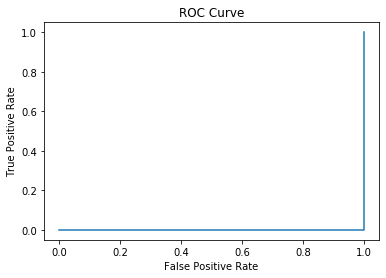

In [11]:
from scipy.integrate import quad

genuine_sigma = math.sqrt(5)
genuine_mean = 20
imposter_mean = 60
imposter_sigma = math.sqrt(15)

def integrand_genuine(x):
    ans = (1/(math.sqrt(2*math.pi)*genuine_sigma)) * (math.exp((-1/(2*(genuine_sigma**2))) * ((x - genuine_mean) ** 2)))
    return ans
    
def integrand_imposter(x):
    ans = (1/(math.sqrt(2*math.pi)*imposter_sigma)) * (math.exp((-1/(2*(imposter_sigma**2))) * ((x - imposter_mean) ** 2)))
    return ans

tpr = []
fpr = []
for s in np.arange(0,100,0.1):
    tpr.append(quad(integrand_genuine,s,math.inf)[0])
    fpr.append(quad(integrand_imposter,s,math.inf)[0])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

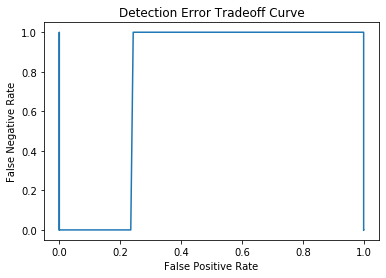

In [12]:
fpr = []
fnr = []
for s in np.arange(0,100,0.1):
    fpr.append(quad(integrand_imposter,s,math.inf)[0])
    fnr.append(quad(integrand_genuine,-math.inf,s)[0])
plt.title("Detection Error Tradeoff Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.plot(fpr,fnr)